# English Premier League Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir("D:\DataSet\EPL")

In [3]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)
stats_df = pd.read_csv('stats.csv') 

In [8]:
stats_df.head() 

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,att_pen_goal,att_freekick_goal,att_ibox_goal,att_obox_goal,goal_fastbreak,total_offside,clean_sheet,goals_conceded,saves,outfielder_block,interception,total_tackle,last_man_tackle,total_clearance,head_clearance,own_goals,penalty_conceded,pen_goals_conceded,total_pass,total_through_ball,total_long_balls,backward_pass,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,5.0,1.0,72.0,11.0,9.0,80.0,16.0,27.0,2.0,81.0,254.0,890.0,1.0,1222.0,NaN,1.0,5.0,3.0,18723.0,NaN,2397.0,NaN,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,3.0,6.0,41.0,23.0,6.0,127.0,22.0,24.0,4.0,74.0,292.0,982.0,0.0,1206.0,NaN,1.0,3.0,2.0,16759.0,NaN,2270.0,NaN,897.0,231.0,24010.0,NaN,2.0,NaN,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,6.0,1.0,46.0,11.0,3.0,120.0,20.0,27.0,1.0,65.0,246.0,969.0,2.0,1115.0,NaN,0.0,1.0,1.0,17154.0,NaN,2800.0,NaN,1107.0,282.0,24150.0,NaN,1.0,NaN,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,10.0,3.0,53.0,10.0,7.0,111.0,12.0,35.0,6.0,73.0,214.0,998.0,1.0,1202.0,NaN,1.0,3.0,3.0,18458.0,NaN,2045.0,NaN,873.0,278.0,25592.0,NaN,1.0,NaN,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,6.0,2.0,44.0,13.0,9.0,149.0,6.0,54.0,11.0,128.0,276.0,995.0,2.0,1412.0,NaN,2.0,7.0,6.0,14914.0,NaN,2408.0,NaN,796.0,181.0,22200.0,NaN,2.0,NaN,0.0,51.0,24.0,2006-2007


In [10]:
stats_df['draws'] = 38 - stats_df['wins'] - stats_df['losses']
pop_column = stats_df.pop('draws')
stats_df.insert(3, 'draws', pop_column)
stats_df['total_matches'] = stats_df['wins'] + stats_df['losses'] + stats_df['draws']
pop_column2 = stats_df.pop('total_matches')
stats_df.insert(4, 'total_matches', pop_column2)
stats_df.head()

,team,wins,losses,draws,total_matches,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,att_pen_goal,att_freekick_goal,att_ibox_goal,att_obox_goal,goal_fastbreak,total_offside,clean_sheet,goals_conceded,saves,outfielder_block,interception,total_tackle,last_man_tackle,total_clearance,head_clearance,own_goals,penalty_conceded,pen_goals_conceded,total_pass,total_through_ball,total_long_balls,backward_pass,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,5.0,38.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,5.0,1.0,72.0,11.0,9.0,80.0,16.0,27.0,2.0,81.0,254.0,890.0,1.0,1222.0,NaN,1.0,5.0,3.0,18723.0,NaN,2397.0,NaN,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,11.0,38.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,3.0,6.0,41.0,23.0,6.0,127.0,22.0,24.0,4.0,74.0,292.0,982.0,0.0,1206.0,NaN,1.0,3.0,2.0,16759.0,NaN,2270.0,NaN,897.0,231.0,24010.0,NaN,2.0,NaN,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,8.0,38.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,6.0,1.0,46.0,11.0,3.0,120.0,20.0,27.0,1.0,65.0,246.0,969.0,2.0,1115.0,NaN,0.0,1.0,1.0,17154.0,NaN,2800.0,NaN,1107.0,282.0,24150.0,NaN,1.0,NaN,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,11.0,38.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,10.0,3.0,53.0,10.0,7.0,111.0,12.0,35.0,6.0,73.0,214.0,998.0,1.0,1202.0,NaN,1.0,3.0,3.0,18458.0,NaN,2045.0,NaN,873.0,278.0,25592.0,NaN,1.0,NaN,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,9.0,38.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,6.0,2.0,44.0,13.0,9.0,149.0,6.0,54.0,11.0,128.0,276.0,995.0,2.0,1412.0,NaN,2.0,7.0,6.0,14914.0,NaN,2408.0,NaN,796.0,181.0,22200.0,NaN,2.0,NaN,0.0,51.0,24.0,2006-2007


In [11]:
df = stats_df.groupby('team').agg({'wins':'sum', 'losses':'sum', 'draws':'sum', 'total_matches':'sum'})
df = df.sort_values(by = 'wins', ascending = False)
df.head(10)

,wins,losses,draws,total_matches
team,,,,
Manchester United,290.0,77.0,89.0,456.0
Chelsea,276.0,79.0,101.0,456.0
Manchester City,256.0,107.0,93.0,456.0
Arsenal,255.0,94.0,107.0,456.0
Liverpool,234.0,103.0,119.0,456.0
Tottenham Hotspur,228.0,116.0,112.0,456.0
Everton,185.0,130.0,141.0,456.0
West Ham United,127.0,181.0,110.0,418.0
Newcastle United,116.0,171.0,93.0,380.0


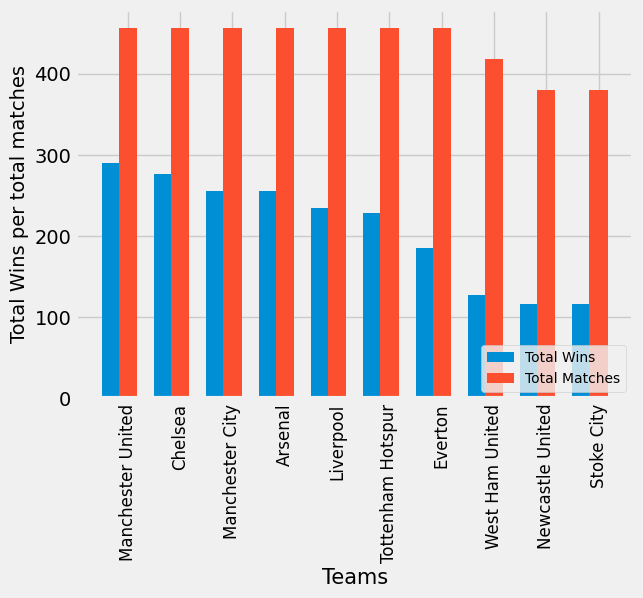

In [12]:
teams = df.index[:10]
wins = df.wins[:10]
matches = df.total_matches[:10]
plt.style.use('fivethirtyeight')
x_index = np.arange(len(teams))
plt.bar(x_index - 0.25, wins, width = 0.5, label = 'Total Wins')
plt.bar(teams, matches, width = 0.35, label = 'Total Matches')
plt.ylabel('Total Wins per total matches', size = 14)
plt.xlabel('Teams', size = 15)
plt.xticks(rotation = 'vertical', size = 12)
plt.legend(loc = 4, prop = {'size': 10})
plt.show()

In [13]:
df2 = df.sort_values(by = 'losses', ascending = False)
df2.head(10)

,wins,losses,draws,total_matches
team,,,,
West Ham United,127.0,181.0,110.0,418.0
Sunderland,95.0,181.0,104.0,380.0
Newcastle United,116.0,171.0,93.0,380.0
Stoke City,116.0,155.0,109.0,380.0
West Bromwich Albion,93.0,154.0,95.0,342.0
Aston Villa,113.0,150.0,117.0,380.0
Everton,185.0,130.0,141.0,456.0
Fulham,87.0,128.0,89.0,304.0
Wigan Athletic,70.0,126.0,70.0,266.0


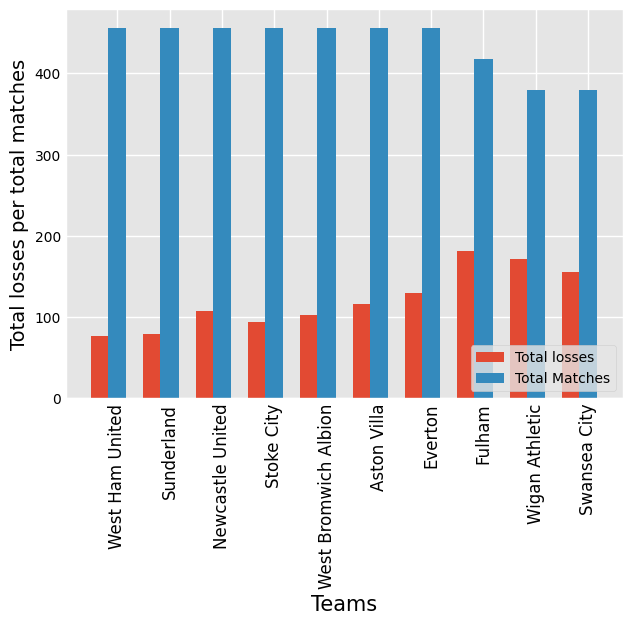

In [14]:
lost_teams = df2.index[:10]
losses = df.losses[:10]
total_matches = df.total_matches[:10]
plt.style.use('ggplot')
x_index2 = np.arange(len(lost_teams))
plt.bar(x_index2 - 0.25, losses, width = 0.5, label = 'Total losses')
plt.bar(lost_teams, total_matches, width = 0.35, label = 'Total Matches')
plt.ylabel('Total losses per total matches', size = 14, color = 'black')
plt.xlabel('Teams', size = 15, color = 'black')
plt.xticks(rotation = 'vertical', size = 12, color = 'black')
plt.yticks(color = 'black')
plt.legend(loc = 4, prop = {'size': 10})
plt.show()

In [15]:
df3 = stats_df.groupby('team').agg({'total_scoring_att':'sum', 'ontarget_scoring_att':'sum'})
df3 = df3.sort_values(by = 'total_scoring_att', ascending = False)
df3.head(10)

,total_scoring_att,ontarget_scoring_att
team,,
Chelsea,7882.0,2667.0
Liverpool,7868.0,2606.0
Tottenham Hotspur,7405.0,2532.0
Arsenal,7339.0,2652.0
Manchester United,7200.0,2530.0
Manchester City,7175.0,2502.0
Everton,6153.0,2086.0
West Ham United,5428.0,1708.0
Newcastle United,4803.0,1539.0


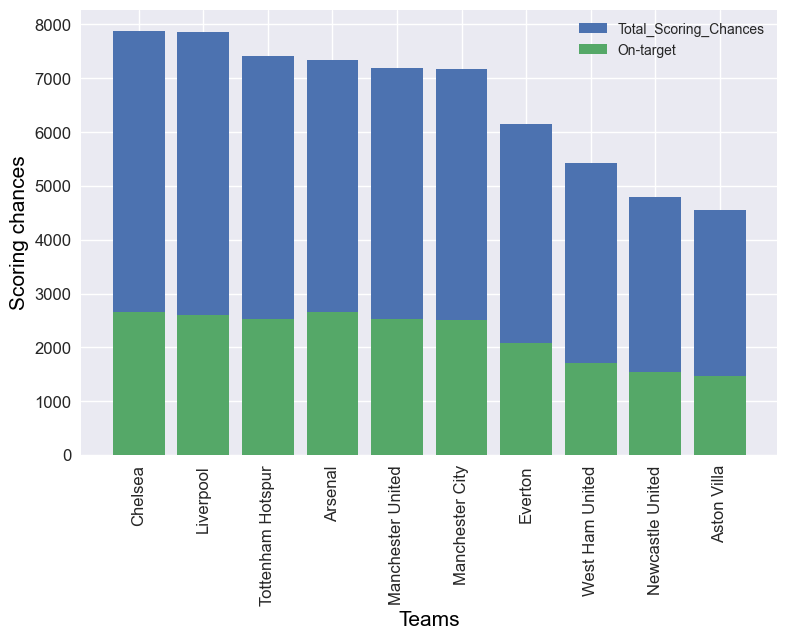

In [16]:
teams = df3.index[:10]
scoring_chances = df3.total_scoring_att[:10]
ontarget = df3.ontarget_scoring_att[:10]
plt.style.use('seaborn')
plt.bar(teams, scoring_chances, label = 'Total_Scoring_Chances')
plt.bar(teams, ontarget, label = 'On-target')
plt.xlabel('Teams', size = 15, color = 'black')
plt.ylabel('Scoring chances', size = 15, color = 'black')
plt.xticks(rotation = 'vertical', size = 12)
plt.yticks(size = 12)
plt.legend()
plt.show()

#### EPL Champion of every seaason from 2006/07 to 2017/18 

In [17]:
df4 = stats_df.groupby('season').first()
df4

,team,wins,losses,draws,total_matches,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,att_pen_goal,att_freekick_goal,att_ibox_goal,att_obox_goal,goal_fastbreak,total_offside,clean_sheet,goals_conceded,saves,outfielder_block,interception,total_tackle,last_man_tackle,total_clearance,head_clearance,own_goals,penalty_conceded,pen_goals_conceded,total_pass,total_through_ball,total_long_balls,backward_pass,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches
season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-2007,Manchester United,28.0,5.0,5.0,38.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,5.0,1.0,72.0,11.0,9.0,80.0,16.0,27.0,2.0,81.0,254.0,890.0,1.0,1222.0,NaN,1.0,5.0,3.0,18723.0,NaN,2397.0,NaN,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0
2007-2008,Manchester United,27.0,5.0,6.0,38.0,80.0,51.0,2.0,696.0,260.0,16.0,12.0,6.0,6.0,64.0,16.0,7.0,100.0,21.0,22.0,2.0,96.0,446.0,978.0,2.0,2022.0,1140.0,0.0,1.0,1.0,17422.0,90.0,2417.0,NaN,936.0,261.0,26620.0,NaN,10.0,627.0,0.0,47.0,23.0
2008-2009,Manchester United,28.0,4.0,6.0,38.0,68.0,61.0,5.0,715.0,230.0,9.0,7.0,4.0,4.0,56.0,12.0,12.0,99.0,24.0,24.0,NaN,120.0,640.0,741.0,8.0,1322.0,716.0,1.0,3.0,3.0,19416.0,291.0,2192.0,NaN,1039.0,257.0,30077.0,NaN,3.0,579.0,0.0,56.0,22.0
2009-2010,Chelsea,27.0,6.0,5.0,38.0,103.0,54.0,5.0,834.0,288.0,13.0,16.0,11.0,3.0,94.0,9.0,8.0,96.0,18.0,32.0,0.0,103.0,705.0,772.0,10.0,1055.0,560.0,1.0,5.0,4.0,18852.0,268.0,2071.0,NaN,1083.0,286.0,28914.0,NaN,3.0,503.0,1.0,87.0,30.0
2010-2011,Manchester United,23.0,4.0,11.0,38.0,78.0,56.0,3.0,618.0,212.0,15.0,18.0,3.0,1.0,71.0,7.0,5.0,102.0,15.0,37.0,0.0,107.0,646.0,693.0,17.0,1053.0,634.0,1.0,6.0,5.0,18870.0,212.0,2279.0,2411.0,1005.0,243.0,26671.0,50.0,2.0,471.0,0.0,45.0,16.0
2011-2012,Manchester City,28.0,5.0,5.0,38.0,93.0,51.0,5.0,738.0,250.0,21.0,10.0,7.0,1.0,73.0,20.0,6.0,85.0,17.0,29.0,1.0,111.0,631.0,694.0,6.0,930.0,525.0,2.0,3.0,2.0,20863.0,321.0,1734.0,2937.0,843.0,269.0,28620.0,65.0,6.0,480.0,1.0,39.0,21.0
2012-2013,Manchester United,28.0,5.0,5.0,38.0,86.0,57.0,1.0,561.0,213.0,24.0,14.0,4.0,1.0,77.0,9.0,2.0,96.0,13.0,43.0,1.0,143.0,514.0,731.0,4.0,1319.0,848.0,4.0,0.0,0.0,19696.0,103.0,1973.0,2727.0,962.0,218.0,27264.0,65.0,5.0,506.0,0.0,38.0,28.0
2013-2014,Manchester City,27.0,6.0,5.0,38.0,102.0,72.0,1.0,673.0,238.0,19.0,10.0,6.0,5.0,86.0,16.0,5.0,59.0,16.0,37.0,88.0,61.0,496.0,756.0,8.0,938.0,531.0,2.0,1.0,1.0,20761.0,120.0,1791.0,3195.0,892.0,283.0,28341.0,59.0,0.0,411.0,0.0,64.0,31.0
2014-2015,Chelsea,26.0,3.0,9.0,38.0,73.0,73.0,4.0,564.0,210.0,15.0,10.0,4.0,1.0,66.0,7.0,1.0,75.0,17.0,32.0,90.0,102.0,376.0,759.0,2.0,1027.0,611.0,1.0,3.0,3.0,20268.0,73.0,2276.0,3259.0,682.0,226.0,27861.0,40.0,2.0,476.0,0.0,73.0,13.0


In [18]:
winner_df = df4.groupby('team').agg({'team':'count'})
winner_df = winner_df.rename(columns = {'team': 'no_of_times_being_champ'})
winner_df = winner_df.sort_values(by = 'no_of_times_being_champ', ascending = False)
winner_df

,no_of_times_being_champ
team,
Manchester United,5
Chelsea,3
Manchester City,3
Leicester City,1


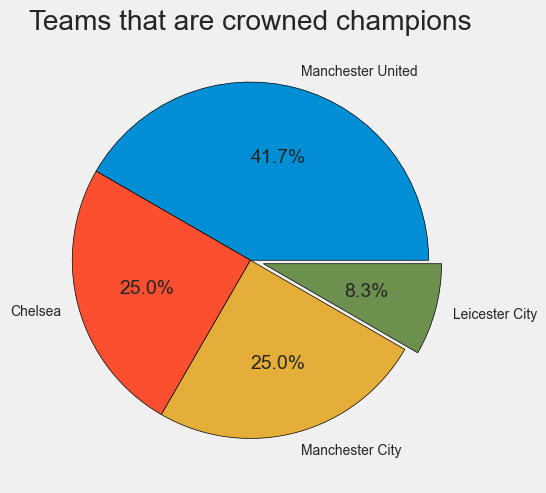

In [19]:
team = winner_df.index
champ = winner_df.no_of_times_being_champ
explode = [0,0,0,0.075]
plt.style.use('fivethirtyeight')
plt.pie(champ, labels = team , explode = explode, wedgeprops = {'edgecolor':'black'}, autopct='%1.1f%%')
plt.title('Teams that are crowned champions')
plt.show()